In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

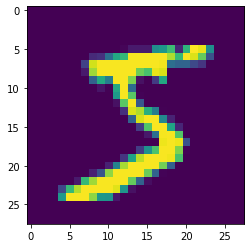

5


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
plt.show()
print(train_labels[0])

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [19]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
history=network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0291 - accuracy: 0.9910
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0221 - accuracy: 0.9934
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0169 - accuracy: 0.9951
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0134 - accuracy: 0.9962
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0102 - accuracy: 0.9970


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
print('test_acc:', test_acc)

test_acc: 0.9775


In [26]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(train_images.ndim)

2


In [28]:
print(train_images.dtype)

float32


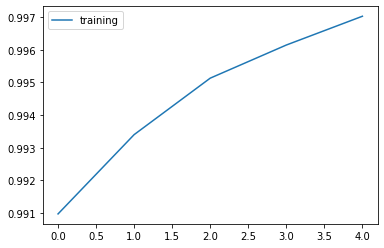

In [33]:
plt.plot(history.history['accuracy'])

plt.legend(['training'], loc='upper left')
plt.show()

In [34]:
from tensorflow.keras import layers
layer = layers.Dense(32, input_shape=(784,))

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

In [36]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [37]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='mse',
metrics=['accuracy'])

In [38]:
dir(optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [39]:
from tensorflow.keras.datasets import imdb

In [40]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 10s 1us/step


In [41]:
print(train_data[0], train_labels[0])
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


9999

In [42]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [47]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [53]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 2s 120us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4948
Epoch 2/50
15000/15000 [==============================] - 2s 110us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/50
15000/15000 [==============================] - 1s 99us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4948
Epoch 4/50
15000/15000 [==============================] - 1s 96us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/50
15000/15000 [==============================] - 1s 99us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/50
15000/15000 [==============================] - 2s 106us/sample - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/50
15000/15000 [=============================

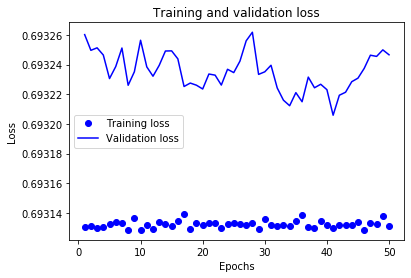

In [54]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 11s 442us/sample - loss: 0.6932 - accuracy: 0.4992
Epoch 2/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.6932 - accuracy: 0.4945
Epoch 3/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.6932 - accuracy: 0.4970
Epoch 4/4
25000/25000 [==============================] - 2s 60us/sample - loss: 0.6932 - accuracy: 0.4919
25000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [56]:
model.predict(x_test)

array([[0.53612584],
       [0.50012183],
       [0.50012183],
       ...,
       [0.50012183],
       [0.50012183],
       [0.50012183]], dtype=float32)

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    #mae_history = history.history['val_mean_absolute_error']
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


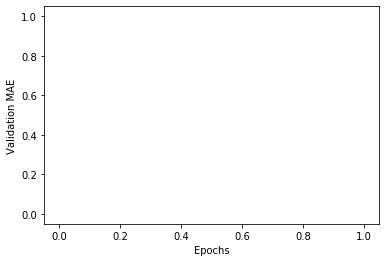

In [10]:


average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
type(history)

tensorflow.python.keras.callbacks.History

In [12]:
help(history)

Help on History in module tensorflow.python.keras.callbacks object:

class History(Callback)
 |  Callback that records events into a `History` object.
 |  
 |  This callback is automatically applied to
 |  every Keras model. The `History` object
 |  gets returned by the `fit` method of models.
 |  
 |  Method resolution order:
 |      History
 |      Callback
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  on_epoch_end(self, epoch, logs=None)
 |      Called at the end of an epoch.
 |      
 |      Subclasses should override for any actions to run. This function should only
 |      be called during TRAIN mode.
 |      
 |      Arguments:
 |          epoch: integer, index of epoch.
 |          logs: dict, metric results for this training epoch, and for the
 |            validation epoch if validation is performed. Validation result keys
 |            are prefixed with `val_`.
 |  
 |  on_train_begin(self, logs=None)
 |      Called at the beginning of training.
 |      
 |

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)              

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1725 - accuracy: 0.9462
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0473 - accuracy: 0.9854
Epoch 3/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0322 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 57s 958us/sample - loss: 0.0246 - accuracy: 0.9925- loss: 0.0247 - accuracy: 
Epoch 5/5
60000/60000 [==============================] - 39s 645us/sample - loss: 0.0192 - accuracy: 0.9940


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.1.0-dev20191003
2.2.4-tf


In [2]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal)
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [4]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [5]:
import numpy as np

train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))

model.fit(train_x, train_y, epochs=10, batch_size=100,
          validation_data=(val_x, val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 12.3085 - categorical_accuracy: 0.0880 - val_loss: 12.6650 - val_categorical_accuracy: 0.0450
Epoch 2/10
1000/1000 [==============================] - 0s 215us/sample - loss: 12.8521 - categorical_accuracy: 0.0890 - val_loss: 13.4722 - val_categorical_accuracy: 0.0450
Epoch 3/10
1000/1000 [==============================] - 0s 43us/sample - loss: 13.9322 - categorical_accuracy: 0.0930 - val_loss: 15.0535 - val_categorical_accuracy: 0.0350
Epoch 4/10
1000/1000 [==============================] - 0s 42us/sample - loss: 16.2252 - categorical_accuracy: 0.0890 - val_loss: 18.5215 - val_categorical_accuracy: 0.0300
Epoch 5/10
1000/1000 [==============================] - 0s 40us/sample - loss: 20.6331 - categorical_accuracy: 0.0890 - val_loss: 24.0943 - val_categorical_accuracy: 0.0300
Epoch 6/10
1000/1000 [==============================] - 0s 41us/sample - loss: 26.6139 -

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(32)
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()

model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset, validation_steps=3)

Train for 30 steps, validate for 3 steps
Epoch 1/10
30/30 [==============================] - 1s 18ms/step - loss: 86.9692 - categorical_accuracy: 0.1219 - val_loss: 111.0567 - val_categorical_accuracy: 0.0729
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 139.0863 - categorical_accuracy: 0.1229 - val_loss: 173.8390 - val_categorical_accuracy: 0.0625
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 211.4485 - categorical_accuracy: 0.1186 - val_loss: 257.2410 - val_categorical_accuracy: 0.0625
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 304.8985 - categorical_accuracy: 0.1143 - val_loss: 359.3262 - val_categorical_accuracy: 0.0938
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 414.7972 - categorical_accuracy: 0.1122 - val_loss: 477.7100 - val_categorical_accuracy: 0.0625
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 533.6250 - categorical_accuracy: 0.1111 - val_l

In [7]:
test_x = np.random.random((1000, 72))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_data = test_data.batch(32).repeat()
model.evaluate(test_data, steps=30)
# predict
result = model.predict(test_x, batch_size=32)
print(result)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

30/30 [==============================] - 0s 1ms/step - loss: 980.8465 - categorical_accuracy: 0.1031
[[0.0000000e+00 1.1370557e-34 0.0000000e+00 ... 1.6674545e-01
  5.6519538e-01 0.0000000e+00]
 [0.0000000e+00 4.4558166e-37 0.0000000e+00 ... 2.7626380e-01
  4.6810845e-01 0.0000000e+00]
 [0.0000000e+00 3.9792265e-34 0.0000000e+00 ... 1.6475593e-01
  5.7899922e-01 0.0000000e+00]
 ...
 [0.0000000e+00 1.7888213e-35 0.0000000e+00 ... 2.2158076e-01
  5.1519066e-01 0.0000000e+00]
 [0.0000000e+00 2.1104932e-37 0.0000000e+00 ... 3.4173262e-01
  3.9294788e-01 0.0000000e+00]
 [0.0000000e+00 1.2972606e-33 0.0000000e+00 ... 2.8526115e-01
  4.6939847e-01 0.0000000e+00]]


In [8]:
input_x = tf.keras.Input(shape=(72,))
hidden1 = layers.Dense(32, activation='relu')(input_x)
hidden2 = layers.Dense(16, activation='relu')(hidden1)
pred = layers.Dense(10, activation='softmax')(hidden2)

model = tf.keras.Model(inputs=input_x, outputs=pred)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 448us/sample - loss: 12.5358 - accuracy: 0.0960
Epoch 2/5
1000/1000 [==============================] - 0s 74us/sample - loss: 18.3964 - accuracy: 0.1040
Epoch 3/5
1000/1000 [==============================] - 0s 77us/sample - loss: 31.2540 - accuracy: 0.0960
Epoch 4/5
1000/1000 [==============================] - 0s 83us/sample - loss: 52.3843 - accuracy: 0.0980
Epoch 5/5
1000/1000 [==============================] - 0s 98us/sample - loss: 86.5975 - accuracy: 0.0920


In [9]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.layer1 = layers.Dense(32, activation='relu')
        self.layer2 = layers.Dense(num_classes, activation='softmax')
    def call(self, inputs):
        h1 = self.layer1(inputs)
        out = self.layer2(h1)
        return out

    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.num_classes
        return tf.TensorShape(shape)

model = MyModel(num_classes=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=16, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 953us/sample - loss: 16.4552 - accuracy: 0.0900
Epoch 2/5
1000/1000 [==============================] - 0s 142us/sample - loss: 25.2544 - accuracy: 0.0880
Epoch 3/5
1000/1000 [==============================] - 0s 133us/sample - loss: 32.6196 - accuracy: 0.0880
Epoch 4/5
1000/1000 [==============================] - 0s 143us/sample - loss: 39.3237 - accuracy: 0.0890
Epoch 5/5
1000/1000 [==============================] - 0s 99us/sample - loss: 45.6015 - accuracy: 0.1020


In [10]:
class MyLayer(layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        shape = tf.TensorShape((input_shape[1], self.output_dim))
        self.kernel = self.add_weight(name='kernel1', shape=shape,
                                   initializer='uniform', trainable=True)
        super(MyLayer, self).build(input_shape)

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.output_dim
        return tf.TensorShape(shape)

    def get_config(self):
        base_config = super(MyLayer, self).get_config()
        base_config['output_dim'] = self.output_dim
        return base_config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

model = tf.keras.Sequential(
[
    MyLayer(10),
    layers.Activation('softmax')
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=16, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 363us/sample - loss: 11.5991 - accuracy: 0.1070
Epoch 2/5
1000/1000 [==============================] - 0s 102us/sample - loss: 11.5986 - accuracy: 0.1050
Epoch 3/5
1000/1000 [==============================] - 0s 129us/sample - loss: 11.5953 - accuracy: 0.1090
Epoch 4/5
1000/1000 [==============================] - 0s 122us/sample - loss: 11.5929 - accuracy: 0.1010
Epoch 5/5
1000/1000 [==============================] - 0s 111us/sample - loss: 11.5917 - accuracy: 0.1090


In [12]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='.\logs')
]
model.fit(train_x, train_y, batch_size=16, epochs=5,
         callbacks=callbacks, validation_data=(val_x, val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/5
1000/1000 [==============================] - 0s 492us/sample - loss: 11.5897 - accuracy: 0.1070 - val_loss: 11.6990 - val_accuracy: 0.1400
Epoch 2/5
1000/1000 [==============================] - 0s 178us/sample - loss: 11.5915 - accuracy: 0.1090 - val_loss: 11.6974 - val_accuracy: 0.1350
Epoch 3/5
1000/1000 [==============================] - 0s 176us/sample - loss: 11.5901 - accuracy: 0.1060 - val_loss: 11.6940 - val_accuracy: 0.1200
Epoch 4/5
1000/1000 [==============================] - 0s 190us/sample - loss: 11.5875 - accuracy: 0.1040 - val_loss: 11.6971 - val_accuracy: 0.1550
Epoch 5/5
1000/1000 [==============================] - 0s 184us/sample - loss: 11.5862 - accuracy: 0.1080 - val_loss: 11.6912 - val_accuracy: 0.1450


In [13]:
model = tf.keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.save_weights('./weights/model')
model.load_weights('./weights/model')
model.save_weights('./model.h5')
model.load_weights('./model.h5')

ValueError: Weights for model sequential_3 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [14]:
# 序列化成json
import json
import pprint
json_str = model.to_json()
pprint.pprint(json.loads(json_str))
fresh_model = tf.keras.models.model_from_json(json_str)
# 保持为yaml格式  #需要提前安装pyyaml

yaml_str = model.to_yaml()
print(yaml_str)
fresh_model = tf.keras.models.model_from_yaml(yaml_str)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'seed': None}},
                                   'kernel_regularizer': None,
                                   'name': 'dense_17',
                                   'trainable': True,
                                   'units'

D:\Anaconda\lib\site-packages\tensorflow_core\python\keras\saving\model_config.py:76: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


In [15]:
model = tf.keras.Sequential([
  layers.Dense(10, activation='softmax', input_shape=(72,)),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=5)
model.save('all_model.h5')
model = tf.keras.models.load_model('all_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 563us/sample - loss: 11.5711 - accuracy: 0.1180
Epoch 2/5
1000/1000 [==============================] - 0s 71us/sample - loss: 11.6440 - accuracy: 0.1070
Epoch 3/5
1000/1000 [==============================] - 0s 74us/sample - loss: 11.7223 - accuracy: 0.1030
Epoch 4/5
1000/1000 [==============================] - 0s 71us/sample - loss: 11.7467 - accuracy: 0.0980
Epoch 5/5
1000/1000 [==============================] - 0s 71us/sample - loss: 11.7532 - accuracy: 0.0980


In [16]:
model = tf.keras.Sequential([layers.Dense(10,activation='softmax'),
                          layers.Dense(10,activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

estimator = tf.keras.estimator.model_to_estimator(model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Zjx\\AppData\\Local\\Temp\\tmpahxee92p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
import contextlib

# 构建包含上下文管理器的函数，使其可以在with中使用
@contextlib.contextmanager
def assert_raises(error_class):
    try:
        yield
    except error_class as e:
        print('Caught expected exception \n  {}: {}'.format(error_class, e))
    except Exception as e:
        print('Got unexpected exception \n  {}: {}'.format(type(e), e))
    else:
        raise Exception('Expected {} to be raised but no error was raised!'.format(
            error_class))

In [18]:
@tf.function
def add(a, b):
    return a+b

add(tf.ones([2,2]), tf.ones([2,2]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [19]:
# tf.function操作可以计算梯度
@tf.function
def add(a, b):
    return a+b
v = tf.Variable(2.0)
with tf.GradientTape() as tape:
    res = add(v, 1.0)


In [20]:
tape.gradient(res, v)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [21]:
@tf.function
def dense_layer(x, w, b):
    return add(tf.matmul(x, w), b)

dense_layer(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [22]:
# 函数的多态
@tf.function
def double(a):
    print('追踪变量：',a)
    return a + a

print('结果:',double(tf.constant(1)))
print()
print('结果:',double(tf.constant(1.1)))
print()
print('结果:',double(tf.constant('c')))
print()

追踪变量： Tensor("a:0", shape=(), dtype=int32)
结果: tf.Tensor(2, shape=(), dtype=int32)

追踪变量： Tensor("a:0", shape=(), dtype=float32)
结果: tf.Tensor(2.2, shape=(), dtype=float32)

追踪变量： Tensor("a:0", shape=(), dtype=string)
结果: tf.Tensor(b'cc', shape=(), dtype=string)



In [24]:
print('构建许可的追踪')
double_strings = double.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.string))
print("执行追踪函数")
print(double_strings(tf.constant("a")))
print(double_strings(a=tf.constant("b")))
print("使用不合法参数")
with assert_raises(tf.errors.InvalidArgumentError):
    double_strings(tf.constant(1))

构建许可的追踪
追踪变量： Tensor("a:0", dtype=string)
执行追踪函数
tf.Tensor(b'aa', shape=(), dtype=string)
tf.Tensor(b'bb', shape=(), dtype=string)
使用不合法参数
Caught expected exception 
  <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>: cannot compute __inference_double_12493 as input #0(zero-based) was expected to be a string tensor but is a int32 tensor [Op:__inference_double_12493]


In [25]:
def train_one_step():
    pass

@tf.function
def train(num_steps):
    print("追踪： num_steps = {}".format(num_steps))
    for _ in tf.range(num_steps):
        train_one_step()

train(num_steps=10)
train(num_steps=20)

追踪： num_steps = 10
追踪： num_steps = 20


In [26]:
external_var = tf.Variable(0)
@tf.function
def buggy_consume_next(iterator):
    external_var.assign_add(next(iterator))
    tf.print('external_var:', external_var)

iterator = iter([0,1,2,3])
buggy_consume_next(iterator)
# 后面没有正常迭代，输出的都是第一个
buggy_consume_next(iterator)
buggy_consume_next(iterator)

external_var: 0
external_var: 0
external_var: 0


In [27]:
def measure_graph_size(f, *args):
    g = f.get_concrete_function(*args).graph
    print("{}({}) 的图中包含了 {} 个节点".format(
      f.__name__, ', '.join(map(str, args)), len(g.as_graph_def().node)))

@tf.function
def train(dataset):
    loss = tf.constant(0)
    for x, y in dataset:
        loss += tf.abs(y - x) # Some dummy computation.
    return loss

small_data = [(1, 1)] * 2
big_data = [(1, 1)] * 10
measure_graph_size(train, small_data)
measure_graph_size(train, big_data)

measure_graph_size(train, tf.data.Dataset.from_generator(
    lambda: small_data, (tf.int32, tf.int32)))
measure_graph_size(train, tf.data.Dataset.from_generator(
    lambda: big_data, (tf.int32, tf.int32)))

train([(1, 1), (1, 1)]) 的图中包含了 8 个节点
train([(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]) 的图中包含了 32 个节点
train(<FlatMapDataset shapes: (<unknown>, <unknown>), types: (tf.int32, tf.int32)>) 的图中包含了 9 个节点
train(<FlatMapDataset shapes: (<unknown>, <unknown>), types: (tf.int32, tf.int32)>) 的图中包含了 9 个节点


In [28]:
# 按顺序自动执行
a = tf.Variable(1.0)
b = tf.Variable(2.0)

@tf.function
def f(x, y):
    a.assign(y * b)
    b.assign_add(x * a)
    return a + b

In [29]:
f(a, b)

<tf.Tensor: shape=(), dtype=float32, numpy=22.0>

In [30]:
class C: pass
obj = C(); obj.v = None

@tf.function
def g(x):
    if obj.v is None:
        obj.v = tf.Variable(1.0)
    return obj.v.assign_add(x)

print(g(1.0))  # 2.0
print(g(2.0))  # 4.0

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [37]:
state = []
@tf.function
def fn(x):
    if not state:
        state.append(tf.Variable(2.0 * x))
        state.append(tf.Variable(state[0] * 3.0))
    return state[0] * x * state[1]

print(fn(tf.constant(1.0)))
print(fn(tf.constant(3.0)))
print(state[1], state[0])

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(36.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=6.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [38]:
# 简单的循环
@tf.function
def f(x):
    # 直接用python中的while写循环
    while tf.reduce_sum(x) > 1:
        tf.print(x)
        x = tf.tanh(x)
    return x
f(tf.random.uniform([5]))

[0.396159053 0.245230317 0.307795167 0.0656830072 0.108475804]
[0.376657695 0.240429863 0.298429936 0.0655887052 0.108052321]
[0.359801322 0.235901698 0.28987512 0.065494813 0.107633755]
[0.345039 0.231621 0.282019854 0.0654013231 0.107220024]
[0.331968546 0.227565944 0.274773479 0.0653082281 0.106811024]


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.3202885 , 0.22371738, 0.26806092, 0.06521553, 0.10640667],
      dtype=float32)>

In [41]:
def f(x):
    while tf.reduce_sum(x) > 1:
        tf.print(x)
        x = tf.tanh(x)
    return x

print(tf.autograph.to_code(f))


def tf__f_1(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('f', 'f_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as f_scope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def loop_body(x):
      ag__.converted_call(tf.print, f_scope.callopts, (x,), None, f_scope)
      x = ag__.converted_call(tf.tanh, f_scope.callopts, (x,), None, f_scope)
      return x,

    def loop_test(x):
      return ag__.converted_call(tf.reduce_sum, f_scope.callopts, (x,), None, f_scope) > 1
    x, = ag__.while_stmt(loop_test, loop_body, get_state, set_state, (x,), ('x',), ())
    do_return = True
    retval_ = f_scope.mark_return_value(x)
  do_return,
  return ag__.retval(retval_)



In [42]:
# 测试
def test_tf_cond(f, *args):
    # 获取图
    g = f.get_concrete_function(*args).graph
    if any(node.name=='cond' for node in g.as_graph_def().node):
        print("{}({}) 使用 tf.cond.".format(
        f.__name__, ', '.join(map(str, args))))
    else:
        print("{}({}) 正常执行.".format(
            f.__name__, ', '.join(map(str, args))))

In [43]:
@tf.function
def hyperparam_cond(x, training=True):
    if training:
        x = tf.nn.dropout(x, rate=0.5)
    return x

@tf.function
def maybe_tensor_cond(x):
    if x < 0:
        x = -x
    return x

In [44]:
test_tf_cond(hyperparam_cond, tf.ones([1], dtype=tf.float32))
test_tf_cond(maybe_tensor_cond, tf.constant(-1)) # 条件为tensor
test_tf_cond(maybe_tensor_cond, -1)

hyperparam_cond(tf.Tensor([1.], shape=(1,), dtype=float32)) 正常执行.
maybe_tensor_cond(tf.Tensor(-1, shape=(), dtype=int32)) 使用 tf.cond.
maybe_tensor_cond(-1) 正常执行.


In [45]:
@tf.function
def f():
    x = tf.constant(0)
    if tf.constant(True): 
        x = x + 1
        tf.print('执行，x：', x)
        print("Tracing `then` branch")
    else:
        x = x - 1
        tf.print('执行，x：', x)  # 没有执行
        print("Tracing `else` branch")  # 该分支虽然不执行但也被追踪
    return x

f()

Tracing `then` branch
Tracing `else` branch
执行，x： 1


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [46]:
@tf.function
def f():
    if tf.constant(True):
        x = tf.ones([3, 3])
    return x

# 两个分支必须都定义x， 否则会抛出异常
with assert_raises(ValueError):
    f()

Caught expected exception 
  <class 'ValueError'>: in converted code:

    <ipython-input-46-27613d588448>:3 f  *
        if tf.constant(True):
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:918 if_stmt
        basic_symbol_names, composite_symbol_names)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:956 tf_if_stmt
        error_checking_orelse)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\util\deprecation.py:507 new_func
        return func(*args, **kwargs)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\control_flow_ops.py:1174 cond
        return cond_v2.cond_v2(pred, true_fn, false_fn, name)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\cond_v2.py:90 cond_v2
        op_return_value=pred)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\func_graph.py:943 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwar

In [47]:
# 测试
def test_dynamically_unrolled(f, *args):
    g = f.get_concrete_function(*args).graph
    if any(node.name == 'while' for node in g.as_graph_def().node):
        print("{}({}) uses tf.while_loop.".format(
            f.__name__, ', '.join(map(str, args))))
    elif any(node.name == 'ReduceDataset' for node in g.as_graph_def().node):
        print("{}({}) uses tf.data.Dataset.reduce.".format(
            f.__name__, ', '.join(map(str, args))))
    else:
        print("{}({}) gets unrolled.".format(
            f.__name__, ', '.join(map(str, args))))
@tf.function
def for_in_range():
    x = 0
    for i in range(5):
        x += i
    return x

@tf.function
def for_in_tfrange():
    x = tf.constant(0, dtype=tf.int32)
    for i in tf.range(5):  # 生成迭代的张量
        x += i
    return x


@tf.function
def for_in_tfdataset():
    x = tf.constant(0, dtype=tf.int64)
    for i in tf.data.Dataset.range(5):
        x += i
    return x

test_dynamically_unrolled(for_in_range)
test_dynamically_unrolled(for_in_tfrange)
test_dynamically_unrolled(for_in_tfdataset)

for_in_range() gets unrolled.
for_in_tfrange() uses tf.while_loop.
for_in_tfdataset() uses tf.data.Dataset.reduce.


In [48]:
@tf.function
def while_py_cond():
    x = 5
    while x > 0:
        x -= 1
    return x

@tf.function
def while_tf_cond():
    x = tf.constant(5)
    while x > 0:   # while中的x为张量
        x -= 1
    return x

test_dynamically_unrolled(while_py_cond)
test_dynamically_unrolled(while_tf_cond)

while_py_cond() gets unrolled.
while_tf_cond() uses tf.while_loop.


In [49]:
@tf.function
def buggy_while_py_true_tf_break(x):
    while True:
        if tf.equal(x, 0):
            break
        x -= 1
    return x

@tf.function
def while_tf_true_tf_break(x):
    while tf.constant(True):  # 有break，顶级条件必须为张量
        if tf.equal(x, 0):
            break
        x -= 1
    return x

with assert_raises(TypeError):
    test_dynamically_unrolled(buggy_while_py_true_tf_break, 5)

Caught expected exception 
  <class 'TypeError'>: in converted code:

    <ipython-input-49-eb01ee726e88>:3 buggy_while_py_true_tf_break  *
        while True:
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:755 while_stmt
        return _py_while_stmt(test, body, get_state, set_state, init_vars, opts)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:870 _py_while_stmt
        while test(*loop_vars):
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py:759 __bool__
        self._disallow_bool_casting()
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py:525 _disallow_bool_casting
        "using a `tf.Tensor` as a Python `bool`")
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py:512 _disallow_when_autograph_enabled
        " decorating it directly with @tf.function.".format(task))

    OperatorNotAllowedInGraphError: using a `tf.Tens

In [50]:
# 实现一个动态rnn
batch_size = 32
seq_len = 3
feature_size=4
# rnn步，输入与状态叠加
def rnn_step(inputs, state):
    return inputs + state

@tf.function
def dynamic_rnn(rnn_step, input_data, initial_state):
    # [batch, time, features] -> [time, batch, features]
    input_data = tf.transpose(input_data, [1, 0, 2])  # 每个时间维度，都是整个batch数据喂入
    max_seq_len = input_data.shape[0]

    # 保存循环中的状态，必须使用tf.TensorArray
    states = tf.TensorArray(tf.float32, size=max_seq_len)
    state = initial_state
    # 迭代时间步
    for i in tf.range(max_seq_len):
        state = rnn_step(input_data[i], state)
        states = states.write(i, state)
    # 把 batch_size重新换到前面
    return tf.transpose(states.stack(), [1, 0, 2])


In [51]:
@tf.function
def buggy_loop_var_uninitialized():
    for i in tf.range(3):
        x = i  # 必须在循环上方初始化好x
    return x

@tf.function
def f():
    x = tf.constant(0)
    for i in tf.range(3):
        x = i
    return x

with assert_raises(ValueError):
    buggy_loop_var_uninitialized()
f()

Caught expected exception 
  <class 'ValueError'>: in converted code:

    <ipython-input-51-05437e37672a>:3 buggy_loop_var_uninitialized  *
        for i in tf.range(3):
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:315 for_stmt
        composite_symbol_names)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:419 _tf_range_for_stmt
        _disallow_undefs_into_loop(*init_vars)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:97 _disallow_undefs_into_loop
        ' before the loop: {}'.format(tuple(s.symbol_name for s in undefined)))

    ValueError: TensorFlow requires that the following symbols must be defined before the loop: ('x',)



<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [52]:
@tf.function
def buggy_loop_type_changes():
    x = tf.constant(0, dtype=tf.float32)
    for i in tf.range(3): # Yields tensors of type tf.int32...
        x = i
    return x

with assert_raises(tf.errors.InvalidArgumentError):
    buggy_loop_type_changes()

Got unexpected exception 
  <class 'TypeError'>: in converted code:

    <ipython-input-52-f464a413782d>:4 buggy_loop_type_changes  *
        for i in tf.range(3): # Yields tensors of type tf.int32...
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:315 for_stmt
        composite_symbol_names)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:478 _tf_range_for_stmt
        opts=opts,
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:794 _tf_while_stmt
        aug_init_vars, **opts)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\control_flow_ops.py:2675 while_loop
        back_prop=back_prop)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\while_v2.py:197 while_loop
        add_control_dependencies=add_control_dependencies)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\func_graph.py:943 func_graph_from_py_func
 

In [53]:
@tf.function
def buggy_concat():
    x = tf.ones([0, 10])
    for i in tf.range(5):
        x = tf.concat([x, tf.ones([1, 10])], axis=0)  # 循环时变量形状不能改变
    return x

with assert_raises(ValueError):
    buggy_concat()

@tf.function
def concat_with_padding():
    x = tf.zeros([5, 10])
    for i in tf.range(5):
        x = tf.concat([x[:i], tf.ones([1, 10]), tf.zeros([4-i, 10])], axis=0)
        x.set_shape([5, 10])
    return x
concat_with_padding()

Caught expected exception 
  <class 'ValueError'>: in converted code:

    <ipython-input-53-ab8c903f6ffc>:4 buggy_concat  *
        for i in tf.range(5):
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:315 for_stmt
        composite_symbol_names)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:478 _tf_range_for_stmt
        opts=opts,
    D:\Anaconda\lib\site-packages\tensorflow_core\python\autograph\operators\control_flow.py:794 _tf_while_stmt
        aug_init_vars, **opts)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\control_flow_ops.py:2675 while_loop
        back_prop=back_prop)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\ops\while_v2.py:197 while_loop
        add_control_dependencies=add_control_dependencies)
    D:\Anaconda\lib\site-packages\tensorflow_core\python\framework\func_graph.py:943 func_graph_from_py_func
        func_outputs = python_func(*func_args, 

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [54]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import matplotlib.pyplot as plt

import tensorflow as tf
print('tf version:', tf.__version__)
print('eager execution:', tf.executing_eagerly())

tf version: 2.1.0-dev20191003
eager execution: True


In [55]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)
print('下载数据至：', train_dataset_fp)

8192/2194 [================================================================================================================] - 0s 9us/step
下载数据至： C:\Users\Zjx\.keras\datasets\iris_training.csv


In [56]:
!head -n5 {train_dataset_fp}

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [57]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# 获取特征和标签名
feature_name = column_names[:-1]
label_name = column_names[-1]

In [58]:
batch_size=32
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.


In [59]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.1, 4.4, 6.8, 7.9, 5. , 5. , 4.6, 5.1, 4.8, 4.9, 5. , 4.8, 5.1,
       6.4, 4.7, 7.2, 6.3, 4.9, 6.7, 6.9, 6.6, 5. , 6.5, 5.9, 6.1, 6.4,
       7.7, 6.1, 5.9, 5.7, 6.5, 6.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.8, 3. , 3. , 3.8, 3.4, 3.4, 3.1, 2.5, 3.1, 3. , 3.5, 3.4, 3.8,
       3.1, 3.2, 3.2, 3.3, 3.1, 3.3, 3.1, 2.9, 3.3, 3.2, 3.2, 2.8, 2.8,
       2.6, 2.6, 3. , 3. , 3. , 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.6, 1.3, 5.5, 6.4, 1.6, 1.5, 1.5, 3. , 1.6, 1.4, 1.6, 1.6, 1.9,
       5.5, 1.3, 6. , 4.7, 1.5, 5.7, 4.9, 4.6, 1.4, 5.1, 4.8, 4.7, 5.6,
       6.9, 5.6, 5.1, 4.2, 5.5, 5.8], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 0.2, 2.1, 2. , 0.4, 0.2, 0.2, 1.1, 0.2, 0.2, 0.6, 0.2, 0.4,
       1.8, 0.2, 1.8, 1.6, 0.1, 2.1, 1.5, 1.3, 0.2, 2. , 1.8,

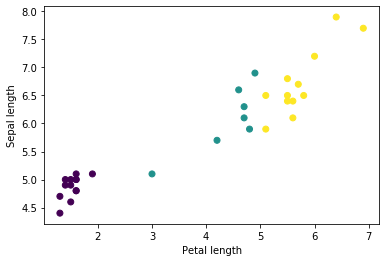

In [60]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [61]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels
# 使用tf.data.Dataset.map将重构函数运用到每条数据中。
train_dataset = train_dataset.map(pack_features_vector)
# 查看前5个数据
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[4.9 3.1 1.5 0.1]
 [5.6 2.9 3.6 1.3]
 [5.4 3.9 1.7 0.4]
 [5.2 3.4 1.4 0.2]
 [6.9 3.1 4.9 1.5]], shape=(5, 4), dtype=float32)


In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [63]:
prediction = model(features)
prediction[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.11347479, -0.21229951,  1.167302  ],
       [-0.26350808, -0.09578504,  1.11013   ],
       [-0.145171  , -0.2429676 ,  1.2958494 ],
       [-0.1145246 , -0.23756061,  1.2371514 ],
       [-0.3044878 , -0.10269702,  1.3794943 ]], dtype=float32)>

In [64]:
tf.nn.softmax(prediction)[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.18164197, 0.16454972, 0.65380836],
       [0.16307089, 0.1928491 , 0.64408004],
       [0.16308323, 0.14788932, 0.6890275 ],
       [0.1739697 , 0.15382953, 0.6722008 ],
       [0.13139644, 0.16077563, 0.707828  ]], dtype=float32)>

In [65]:
print('prediction:', tf.argmax(prediction, axis=1))
print('label:', labels)

prediction: tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(32,), dtype=int64)
label: tf.Tensor([0 1 0 0 1 2 0 1 0 1 0 2 0 2 2 0 2 2 0 0 2 0 1 2 2 1 0 2 0 0 0 2], shape=(32,), dtype=int32)


In [66]:
# 损失函数
loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# 获取损失
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)
l = loss(model, features, labels)
print(l)

tf.Tensor(1.2478958, shape=(), dtype=float32)


In [67]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_value, grads = grad(model, features, labels)
print('步数：{}, 初始loss值：{}'.format(optimizer.iterations.numpy(),
                                loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print('步数：{}, loss值：{}'.format(optimizer.iterations.numpy(),
                                loss(model,features, labels).numpy()))

步数：0, 初始loss值：1.2478958368301392
步数：1, loss值：1.1712405681610107


In [69]:
# 保存loss和acc
train_loss_results=[]
train_accuracy_results=[]

num_epochs =201
for epoch in range(num_epochs):
    # 用于记录loss和acc的类
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # 训练循环
    for x, y in train_dataset:
        # 获取loss和梯度
        loss_value, grads = grad(model, x, y)
        # 梯度优化
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # 记录loss均值
        epoch_loss_avg(loss_value)
        # 记录准确率
        epoch_accuracy(y, model(x))

    # 保存每个epoch的loss和acc
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))


Epoch 000: Loss: 1.097, Accuracy: 35.000%
Epoch 050: Loss: 0.088, Accuracy: 98.333%
Epoch 100: Loss: 0.059, Accuracy: 99.167%
Epoch 150: Loss: 0.058, Accuracy: 98.333%
Epoch 200: Loss: 0.046, Accuracy: 99.167%


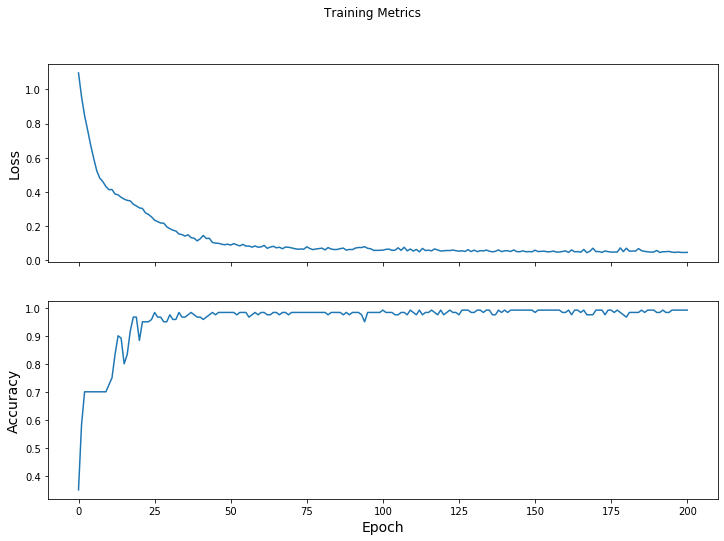

In [70]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [71]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [72]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [73]:
# 准确率统计类
test_accuracy = tf.keras.metrics.Accuracy()

for (x,y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y) 

print('测试集准确率：', test_accuracy.result())

测试集准确率： tf.Tensor(0.96666664, shape=(), dtype=float32)


In [74]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [76]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (100.0%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (99.2%)


In [77]:
x = tf.ones([6,6])
x = x + 3 # x+3后得到了一个新的张量，并把这个张量赋给x
print(x)

tf.Tensor(
[[4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4.]], shape=(6, 6), dtype=float32)


In [78]:
v = tf.Variable(2)
v.assign(6)
print(v)
v.assign_add(tf.square(3))
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=15>


In [80]:
class Model(object):
    def __init__(self):
        # 初始化变量
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b
# 测试
model = Model()
print(model(2))


tf.Tensor(10.0, shape=(), dtype=float32)


In [81]:
def loss(predicted_y, true_y):
    return tf.reduce_mean(tf.square(predicted_y - true_y))

In [82]:
TRUE_W = 3.0
TRUE_b = 2.0
num = 1000

# 随机输入
inputs = tf.random.normal(shape=[num])
# 随机噪音
noise = tf.random.normal(shape=[num])

# 构造数据
outputs = TRUE_W * inputs + TRUE_b + noise

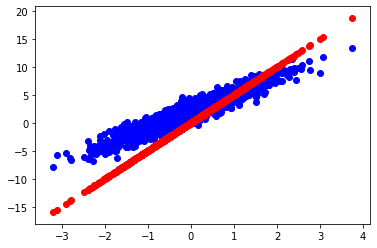

Init Loss:
tf.Tensor(9.599156, shape=(), dtype=float32)


In [83]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

# 当前loss
print('Init Loss:')
print(loss(model(inputs), outputs))

In [84]:
def train(model, inputs, outputs, learning_rate):
    # 记录loss计算过程
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        # 对W，b求导
        dW, db = t.gradient(current_loss, [model.W, model.b])
        # 减去梯度×学习率
        model.W.assign_sub(dW*learning_rate)
        model.b.assign_sub(db*learning_rate)

Epoch  0: W=5.00 b=0.00, loss=9.59916
Epoch  1: W=4.56 b=0.41, loss=6.33849
Epoch  2: W=4.21 b=0.74, loss=4.32083
Epoch  3: W=3.94 b=1.00, loss=3.07185
Epoch  4: W=3.73 b=1.20, loss=2.29842
Epoch  5: W=3.57 b=1.37, loss=1.81928
Epoch  6: W=3.44 b=1.50, loss=1.52234
Epoch  7: W=3.34 b=1.60, loss=1.33824
Epoch  8: W=3.26 b=1.68, loss=1.22405
Epoch  9: W=3.20 b=1.75, loss=1.15319


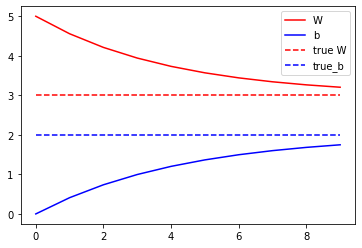

In [85]:
model= Model()

# 收集W，b画图
Ws, bs = [], []
for epoch in range(10):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    # 计算loss
    current_loss = loss(model(inputs), outputs)
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
# 画图
# Let's plot it all
epochs = range(10)
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

In [86]:
#自动求导
x = tf.ones((2,2))

# 需要计算梯度的操作
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y,y)
# 计算z关于x的梯度
dz_dx = t.gradient(z, x)
print(dz_dx)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [87]:
# 梯度求导只能每个tape一次
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y,y)

dz_dy = t.gradient(z, y)
print(dz_dy)

tf.Tensor(8.0, shape=(), dtype=float32)


In [88]:
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

dz_dx = t.gradient(z,x)
print(dz_dx)
dz_dy = t.gradient(z, y)
print(dz_dy)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [89]:
def f(x, y):
    output = 1.0
    # 根据y的循环
    for i in range(y):
        # 根据每一项进行判断
        if i> 1 and i<5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
        # 返回梯度
        return t.gradient(out, x)
# x为固定值
x = tf.convert_to_tensor(2.0)

print(grad(x, 6))
print(grad(x, 5))
print(grad(x, 4))

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [90]:
x = tf.Variable(1.0)

with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x * x * x
    dy_dx = t2.gradient(y, x)
    print(dy_dx)
d2y_d2x = t1.gradient(dy_dx, x)
print(d2y_d2x)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [91]:
#自定义层
class MyDense(tf.keras.layers.Layer):
    def __init__(self, n_outputs):
        super(MyDense, self).__init__()
        self.n_outputs = n_outputs

    def build(self, input_shape):
        self.kernel = self.add_variable('kernel',
                                       shape=[int(input_shape[-1]),
                                             self.n_outputs])
    def call(self, input):
        return tf.matmul(input, self.kernel)
layer = MyDense(10)
print(layer(tf.ones([6, 5])))
print(layer.trainable_variables)

Instructions for updating:
Please use `layer.add_weight` method instead.
tf.Tensor(
[[-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]
 [-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]
 [-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]
 [-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]
 [-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]
 [-0.27851295 -0.97512525 -0.22396028  0.4870401  -0.6502094   0.07890487
  -0.22845954  0.7156871  -0.3111598  -0.47449312]], shape=(6, 10), dtype=float32)
[<tf.Variable 'my_dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.14379495, -0.11264312, -0.01116383,  0.34072286, -0.5

In [92]:
# 残差块
class ResnetBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetBlock, self).__init__(name='resnet_block')

        # 每个子层卷积核数
        filter1, filter2, filter3 = filters

        # 三个子层，每层1个卷积加一个批正则化
        # 第一个子层， 1*1的卷积
        self.conv1 = tf.keras.layers.Conv2D(filter1, (1,1))
        self.bn1 = tf.keras.layers.BatchNormalization()
        # 第二个子层， 使用特点的kernel_size
        self.conv2 = tf.keras.layers.Conv2D(filter2, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        # 第三个子层，1*1卷积
        self.conv3 = tf.keras.layers.Conv2D(filter3, (1,1))
        self.bn3 = tf.keras.layers.BatchNormalization()

    def call(self, inputs, training=False):

        # 堆叠每个子层
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)

        x = self.conv2(x)
        x = self.bn2(x, training=training)

        x = self.conv3(x)
        x = self.bn3(x, training=training)

        # 残差连接
        x += inputs
        outputs = tf.nn.relu(x)

        return outputs

resnetBlock = ResnetBlock(2, [6,4,9])
# 数据测试
print(resnetBlock(tf.ones([1,3,9,9])))
# 查看网络中的变量名
print([x.name for x in resnetBlock.trainable_variables])

tf.Tensor(
[[[[2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.         0.14802957]
   [1.2347955  0.7668527  1.1594673  0.5575182  0.34383678 0.28264654
    0.91325974 0.59704727 0.7013174 ]]

  [[2.6447296  0.92868614 1.0656435  0.         0.78011084 0.
    1.2797277  0.